In [3]:
%matplotlib inline

import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage
import lsst.afw.display.ds9 as ds9
import numpy as np
import math

import matplotlib
import matplotlib.pylab as plt

butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")

raT = []
decT = []
for ccd in range(0,36) :
    dataid = {'visit':849375, 'filter':'r', 'ccd':ccd}

    exp = butler.get('calexp', dataid)
    wcs = exp.getWcs()
    x0, y0 = exp.getXY0()

    ra, dec = wcs.pixelToSky(x0,y0)

#    print math.degrees(ra), math.degrees(dec)
    raT.append(math.degrees(ra))
    decT.append(math.degrees(dec))

In [26]:
import os

D3 = "/home/boutigny/CFHT/test_cfht/rawDownload/D3"
butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")

raT = []
decT = []
for file in os.listdir(D3) :
    visit = int(file.split("p.fits")[0])
    dataid = {'visit':visit, 'filter':'r', 'ccd':0}
    exp = butler.get('calexp', dataid)
    wcs = exp.getWcs()
    x0, y0 = exp.getXY0()
    ra, dec = wcs.pixelToSky(x0,y0)

#    print math.degrees(ra), math.degrees(dec)
    raT.append(math.degrees(ra))
    decT.append(math.degrees(dec))

FitsError: 
  File "src/fits.cc", line 1071, in lsst::afw::fits::Fits::Fits(const std::string&, const std::string&, int)
    cfitsio error: could not open the named file (104) : Opening file '/home/boutigny/CFHT/test_cfht/output/calexp/04BL01/D3/2004-08-11/r/calexp-757222-00.fits' with mode 'r' {0}
lsst::afw::fits::FitsError: 'cfitsio error: could not open the named file (104) : Opening file '/home/boutigny/CFHT/test_cfht/output/calexp/04BL01/D3/2004-08-11/r/calexp-757222-00.fits' with mode 'r''


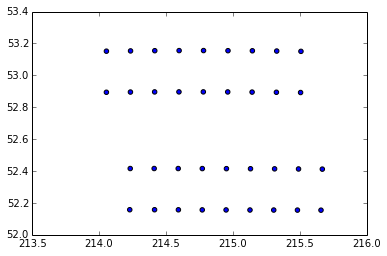

In [4]:
plt.clf()
plt.scatter(raT, decT)
plt.show()

In [12]:
import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage
import lsst.meas.algorithms as measAlg
import lsst.afw.geom as afwGeom
import numpy as np
import math

import matplotlib
import matplotlib.pylab as plt

butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")

filename = "../utils/stage/obs_D3_r_short.list"
file = open(filename, "r")

ra = []
dec = []

sigmaToFwhm = 2.0*math.sqrt(2.0*math.log(2.0)) 

for cnts, visit in enumerate(file) :
    if cnts > 50 :
        break
    visit = int(visit)
    for ccd in [0, 8, 27, 35] :
        dataid = {'visit':visit, 'filter':'r', 'ccd':ccd}

        # Check if astrometry is reasonable for this CCD    
        icMatch = butler.get('icMatch', dataid)
        dist = []
        for match in icMatch :
            dist.append(match.get("distance"))
        check = afwGeom.radToMas(np.median(dist))
        if check > 200 :
            print "Bad astrometry", visit, ccd, check
            continue
        
        exp = butler.get('calexp', dataid)
        
        wcs = exp.getWcs()
        x0, y0 = exp.getXY0()
        h = exp.getHeight()
        w = exp.getWidth()
        
        if ccd == 0 :
            psf = exp.getPsf()

            shape = psf.computeShape()
    
            attr = measAlg.PsfAttributes(psf, x0 + w // 2, y0 + h // 2)
            fwhm = attr.computeGaussianWidth() * wcs.pixelScale().asArcseconds() * sigmaToFwhm
            
            if fwhm > 1 :
                break
        
        if math.degrees(wcs.pixelToSky(x0,y0).getLongitude()) < 200 :
            print "1", visit, ccd, math.degrees(wcs.pixelToSky(x0,y0).getLongitude())
        if math.degrees(wcs.pixelToSky(x0+w,y0).getLongitude()) < 200 :
            print "2", visit, ccd, math.degrees(wcs.pixelToSky(x0+w,y0).getLongitude())
        if math.degrees(wcs.pixelToSky(x0,y0+h).getLongitude()) < 200 :
            print "3", visit, ccd, math.degrees(wcs.pixelToSky(x0,y0+h).getLongitude())
        if math.degrees(wcs.pixelToSky(x0+w,y0+h).getLongitude()) < 200 :
            print "4", visit, ccd, math.degrees(wcs.pixelToSky(x0+w,y0+h).getLongitude())
        
        ra.append(wcs.pixelToSky(x0,y0).getLongitude())
        dec.append(wcs.pixelToSky(x0,y0).getLatitude())
        ra.append(wcs.pixelToSky(x0+w,y0).getLongitude())
        dec.append(wcs.pixelToSky(x0+w,y0).getLatitude())
        ra.append(wcs.pixelToSky(x0,y0+h).getLongitude())
        dec.append(wcs.pixelToSky(x0,y0+h).getLatitude())
        ra.append(wcs.pixelToSky(x0+w,y0+h).getLongitude())
        dec.append(wcs.pixelToSky(x0+w,y0+h).getLatitude())
        
#        print visit, ccd 
#        print math.degrees(wcs.pixelToSky(x0,y0).getLongitude()), math.degrees(wcs.pixelToSky(x0+w,y0).getLongitude()), math.degrees(wcs.pixelToSky(x0,y0+h).getLongitude()), math.degrees(wcs.pixelToSky(x0+w,y0+h).getLongitude())
#        print math.degrees(wcs.pixelToSky(x0,y0).getLatitude()), math.degrees(wcs.pixelToSky(x0+w,y0).getLatitude()), math.degrees(wcs.pixelToSky(x0,y0+h).getLatitude()), math.degrees(wcs.pixelToSky(x0+w,y0+h).getLatitude())

ra = np.array(ra)
dec = np.array(dec)

print ra

print math.degrees(ra.min()), math.degrees(dec.min()), math.degrees(ra.max()), math.degrees(dec.max())


Bad astrometry 850587 27 368.23613524
Bad astrometry 996717 35 589.861942158
[3.76102 rad 3.76406 rad 3.76099 rad 3.76402 rad 3.73567 rad 3.73871 rad
 3.73566 rad 3.7387 rad 3.73885 rad 3.73588 rad 3.73878 rad 3.73578 rad
 3.7613 rad 3.76434 rad 3.76128 rad 3.76432 rad 3.73595 rad 3.73899 rad
 3.73596 rad 3.73899 rad 3.76404 rad 3.76108 rad 3.76413 rad 3.76113 rad
 3.73921 rad 3.73624 rad 3.73912 rad 3.73612 rad 3.76146 rad 3.7645 rad
 3.76144 rad 3.76448 rad 3.7361 rad 3.73914 rad 3.7361 rad 3.73913 rad
 3.76413 rad 3.76115 rad 3.76427 rad 3.76127 rad 3.73933 rad 3.73636 rad
 3.73924 rad 3.73624 rad 3.76115 rad 3.76419 rad 3.76111 rad 3.76415 rad
 3.73577 rad 3.73882 rad 3.73576 rad 3.7388 rad 3.76376 rad 3.76079 rad
 3.76392 rad 3.76092 rad 3.73891 rad 3.73589 rad 3.73908 rad 3.73599 rad
 3.76111 rad 3.76415 rad 3.76109 rad 3.76413 rad 3.73573 rad 3.73877 rad
 3.73574 rad 3.73878 rad 3.76381 rad 3.76083 rad 3.76394 rad 3.76094 rad
 3.73895 rad 3.73593 rad 3.7391 rad 3.73601 rad 3.761

In [25]:
wcs.pixelToSky(

['__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattr__', '__getattribute__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', '_eq_impl', '_s', 'census', 'clone', 'flipImage', 'getCDMatrix', 'getFitsMetadata', 'getId', 'getLinearTransform', 'getNextMemId', 'getPixelOrigin', 'getSkyOrigin', 'hasBeenCorrupted', 'hasDistortion', 'init', 'isFlipped', 'isPersistable', 'linearizePixelToSky', 'linearizeSkyToPixel', 'magicSentinel', 'markPersistent', 'pixArea', 'pixelScale', 'pixelToSky', 'readFits', 'repr', 'rotateImageBy90', 'setCorruptionCallback', 'setDeleteCallback', 'setDeleteCallbackId', 'setNewCallback', 'setNewCallbackId', 'shiftReferencePixel', 'skyToIntermediateWorldCoord', 'skyToPixel', 'swigConvert', 'this', 'writeFits']
